In [96]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [72]:
datasets = ['BAC']
for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start='2023-09-01', end='2023-10-13')
    filename=f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f'Download data for {dataset} and saved as {filename}')

Download data for BAC and saved as BAC_data.csv


In [73]:

Ticker='BAC'
start_date = '2023-09-01'
end_date = '2023-10-13'
data = yf.download(Ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [74]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-01,28.760000,29.129999,28.760000,28.980000,28.980000,35192000
2023-09-05,28.940001,29.120001,28.500000,28.650000,28.650000,46543600
2023-09-06,28.400000,28.559999,28.120001,28.389999,28.389999,45022600
2023-09-07,28.410000,28.549999,28.059999,28.129999,28.129999,35023600
2023-09-08,28.120001,28.379999,27.959999,28.360001,28.360001,36513900


In [79]:
data['Bid'] = data['Low']
data['Ask'] =data['High']

In [80]:
data['bid-ask-Spread'] = data['Ask'] - data['Bid']

In [81]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Bid,Ask,bid-ask-Spread
Date,,,,,,,,,
2023-10-06,25.770000,26.230000,25.469999,26.070000,26.070000,58120700,25.469999,26.230000,0.760000
2023-10-09,25.760000,26.360001,25.719999,26.309999,26.309999,39953700,25.719999,26.360001,0.640001
2023-10-10,26.610001,27.299999,26.570000,27.010000,27.010000,51960100,26.570000,27.299999,0.730000
2023-10-11,27.170000,27.440001,26.900000,27.020000,27.020000,38508200,26.900000,27.440001,0.540001
2023-10-12,26.969999,27.080000,26.610001,26.900000,26.900000,44249800,26.610001,27.080000,0.469999


In [82]:
data['Prev_close'] = data['Close'].dropna()


In [83]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Bid,Ask,bid-ask-Spread,Prev_close
Date,,,,,,,,,,
2023-10-06,25.770000,26.230000,25.469999,26.070000,26.070000,58120700,25.469999,26.230000,0.760000,26.070000
2023-10-09,25.760000,26.360001,25.719999,26.309999,26.309999,39953700,25.719999,26.360001,0.640001,26.309999
2023-10-10,26.610001,27.299999,26.570000,27.010000,27.010000,51960100,26.570000,27.299999,0.730000,27.010000
2023-10-11,27.170000,27.440001,26.900000,27.020000,27.020000,38508200,26.900000,27.440001,0.540001,27.020000
2023-10-12,26.969999,27.080000,26.610001,26.900000,26.900000,44249800,26.610001,27.080000,0.469999,26.900000


In [84]:
x = data[['bid-ask-Spread']]
y = data['Prev_close']

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge

In [86]:
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [88]:
model.coef_

array([-2.9711118])

In [89]:
model.scores_

array([-31.47875901, -30.59425854, -30.3670219 , -30.35664571,
       -30.35642444, -30.35642033, -30.35642026, -30.35641178])

In [90]:
print('Bayesian Ridge Regression Score:', model.score(X_test, y_test))

Bayesian Ridge Regression Score: 0.1743282549024171


In [91]:
data['Bayesian Ridge Regression Score'] = 0.17

# **Data Visualization Finance**

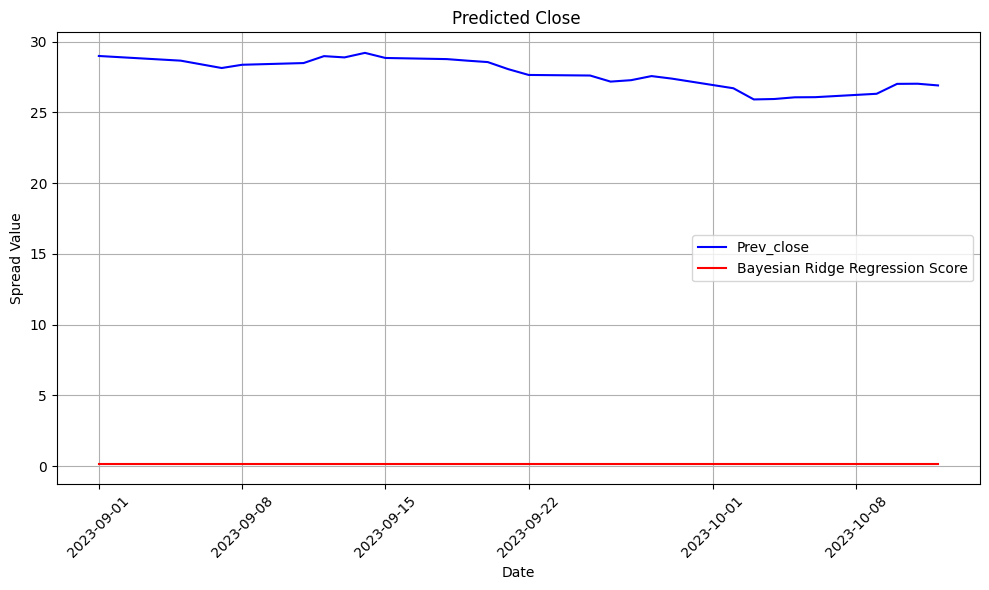

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Prev_close'], label='Prev_close', color='blue')
plt.plot(data.index, data['Bayesian Ridge Regression Score'], label='Bayesian Ridge Regression Score', color='red')
plt.xlabel('Date')
plt.ylabel('Spread Value')
plt.title('Predicted Close ')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

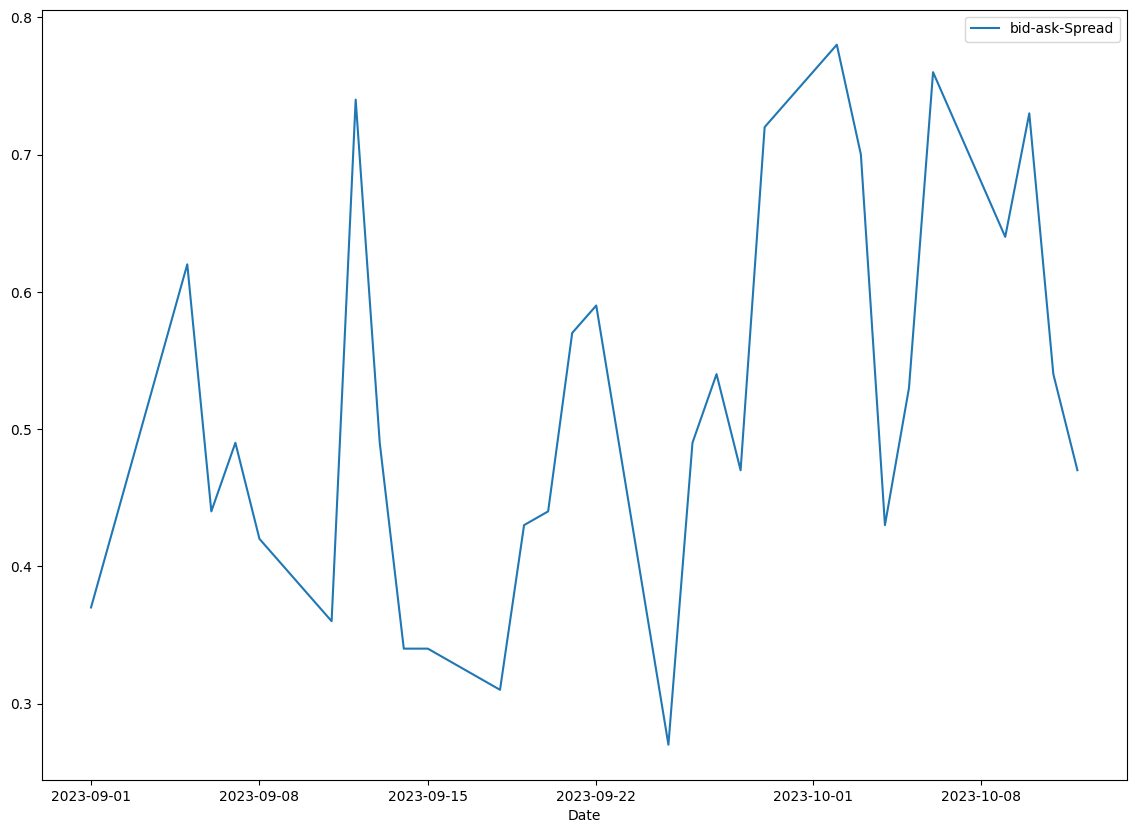

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax = sns.lineplot(data[['bid-ask-Spread']])

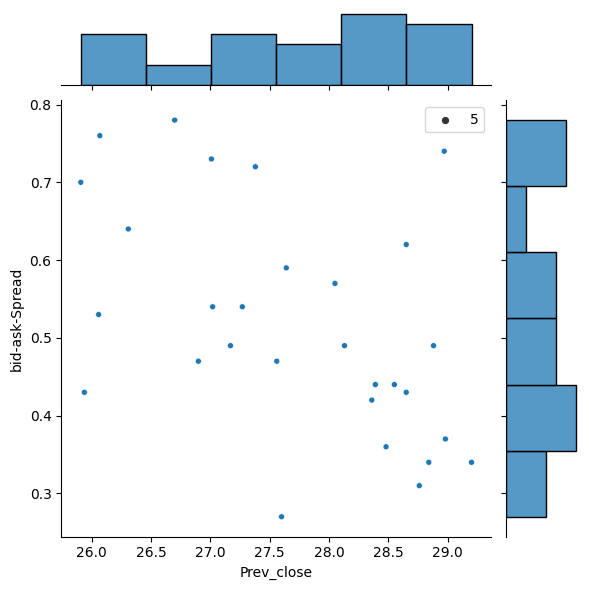

In [100]:
sns.jointplot(x= data['Prev_close'], y = data['bid-ask-Spread'], size=5)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


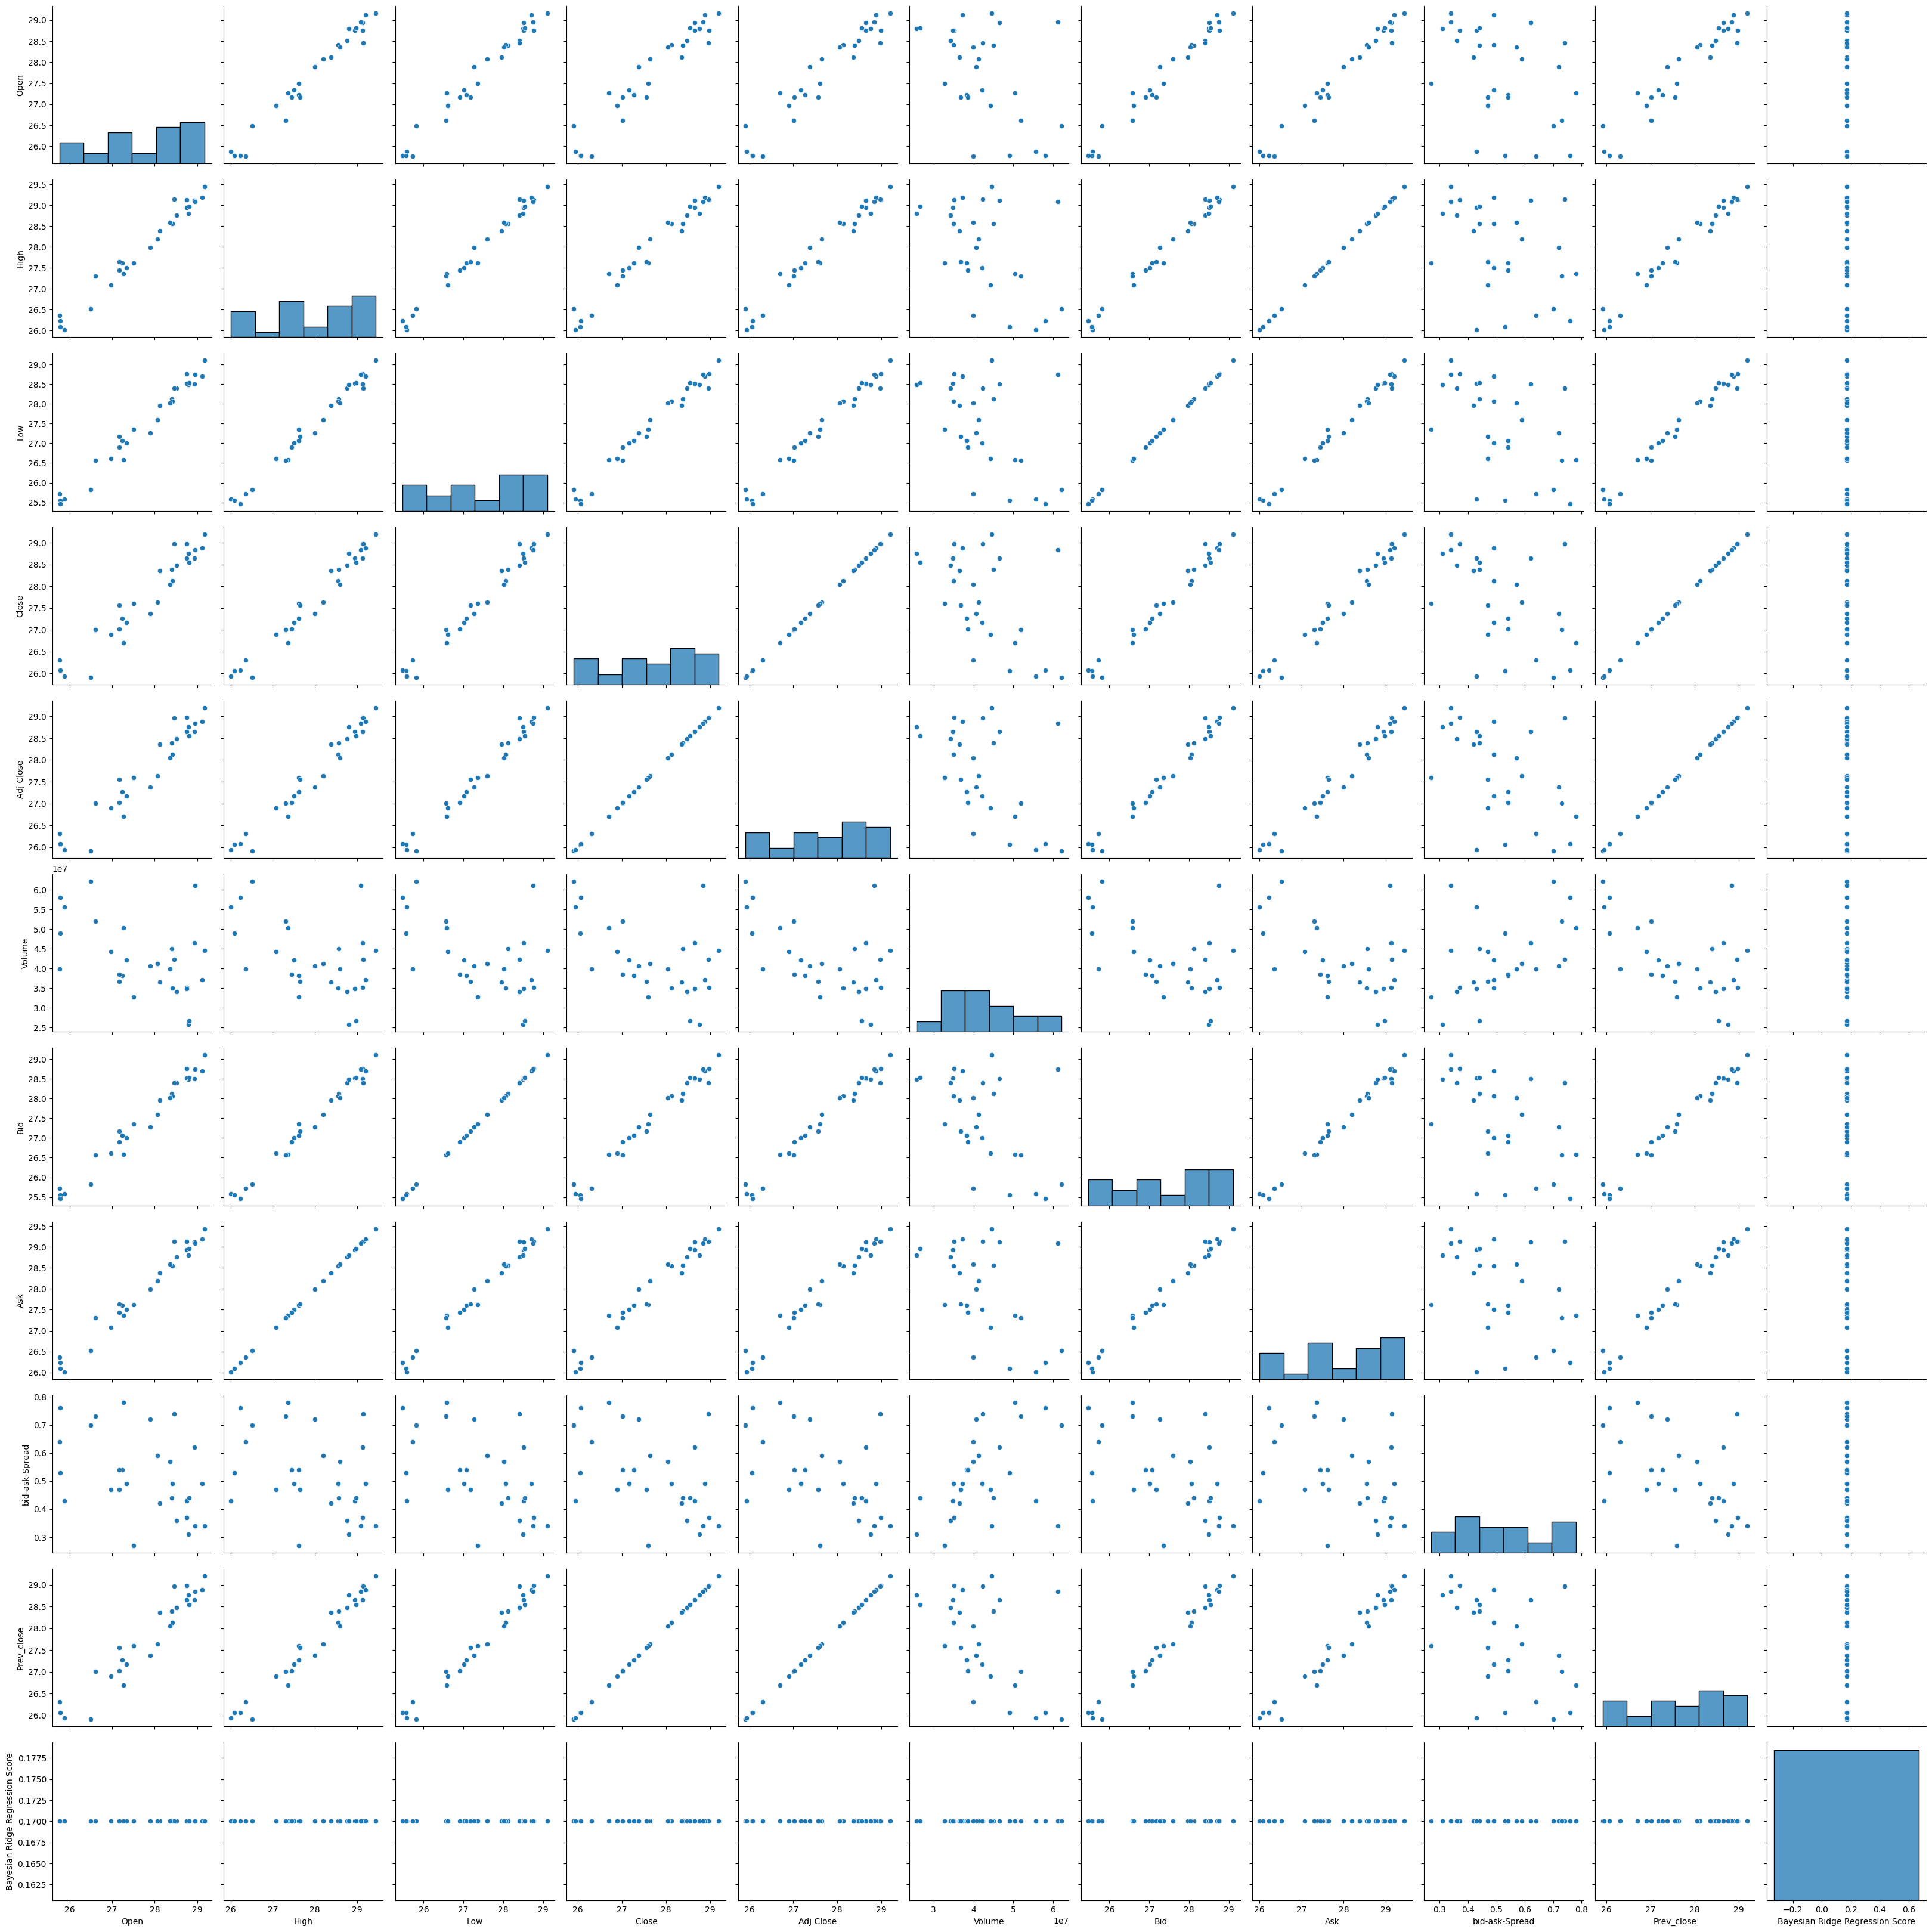

In [107]:
sns.pairplot(data, size=3)

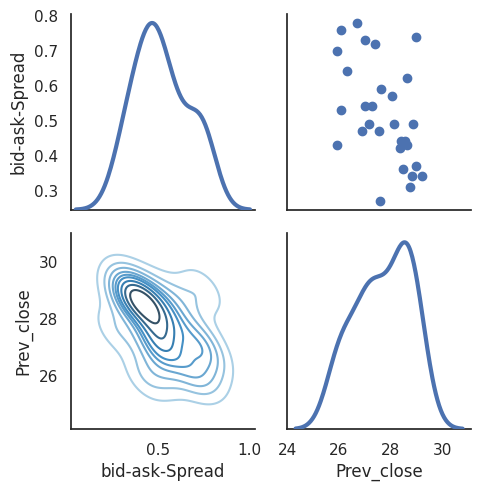

In [110]:
sns.set(style='white')
df = data.loc[:,['bid-ask-Spread', 'Prev_close']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# ***Math Tools ***

In [93]:
def f(x):
    return np.sin(x) + 0.5 * x

In [94]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50 )

Text(0, 0.5, 'f(x)')

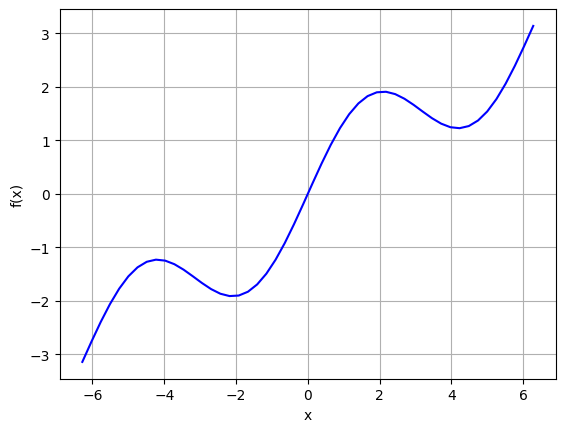

In [95]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [5]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

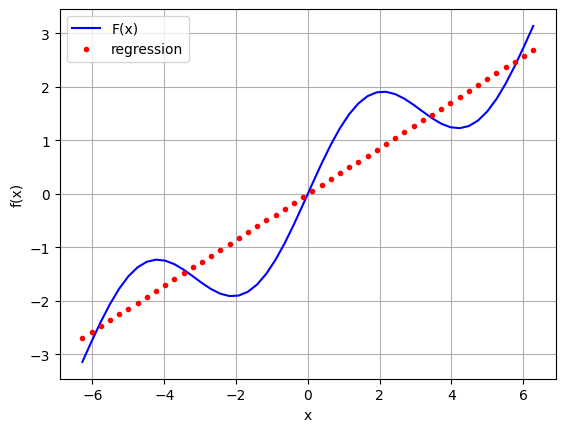

In [6]:
plt.plot(x, f(x), 'b', label='F(x)')
plt.plot(x, ry, 'r.', label="regression")
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [13]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

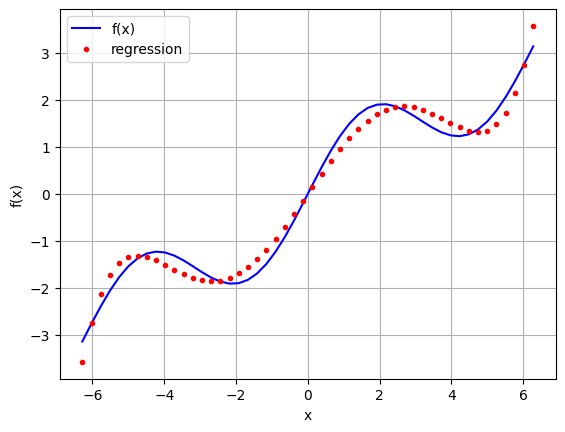

In [14]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [15]:
np.allclose(f(x), ry)

False

In [16]:
np.sum((f(x)- ry) ** 2) / len(x)

0.05388251552308743

In [18]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [19]:
reg = np.linalg.lstsq(matrix.T,  f(x))[0]

<ipython-input-19-42bf44ac23cc>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  reg = np.linalg.lstsq(matrix.T,  f(x))[0]


In [20]:
reg

array([ 1.16778801e-14,  5.62777448e-01, -8.88178420e-16, -5.43553615e-03])

In [21]:
ry = np.dot(reg, matrix)


Text(0, 0.5, 'f(x)')

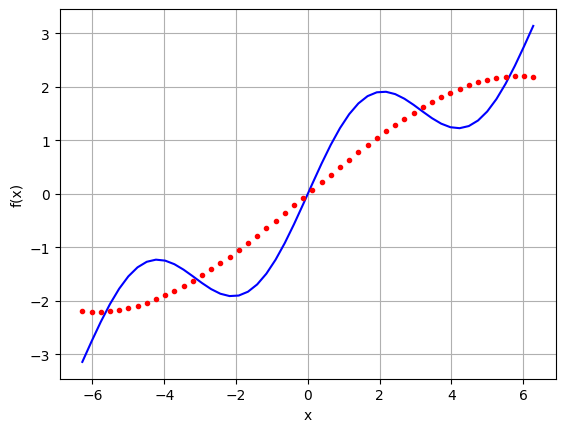

In [22]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.plot(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')